In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module2/L2/diabetes.csv",header=0)
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
162,0,114,80,34,285,44.2,0.167,27,0
427,1,181,64,30,180,34.1,0.328,38,1
276,7,106,60,24,0,26.5,0.296,29,1
344,8,95,72,0,0,36.8,0.485,57,0
253,0,86,68,32,0,35.8,0.238,25,0


In [6]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=11111)

In [12]:
np.mean(y)*100 ,np.mean(1-y)*100

(34.89583333333333, 65.10416666666666)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

y_pred_class_rf = model.predict(x_test)
y_pred_prob_rf = model.predict_proba(x_test)  # Assuming the positive class is the second column

print("accuracy is {:.3f}".format(accuracy_score(y_test, y_pred_class_rf)))

print("roc-auc is {:.3f}".format(roc_auc_score(y_test, y_pred_prob_rf[:, 1])))

print("confusion matrix:\n", confusion_matrix(y_test, y_pred_class_rf))

accuracy is 0.771
roc-auc is 0.835
confusion matrix:
 [[106  17]
 [ 27  42]]


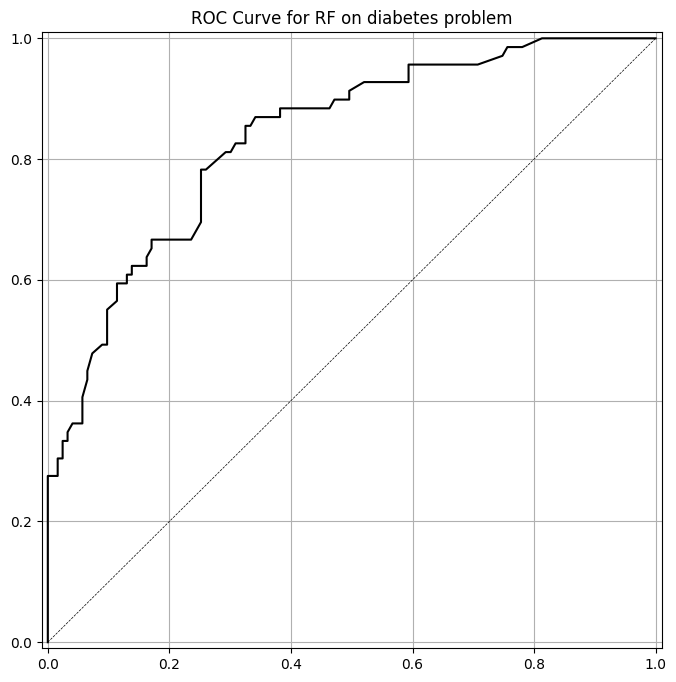

In [23]:
def plot_roc(y_test, y_pred_prob, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred_prob)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, "k-")
    ax.plot([0, 1], [0, 1], "k--", linewidth=0.5)
    ax.grid(True)
    
    ax.set_title(f"ROC Curve for {model_name} on diabetes problem")
    ax.set_xlim([-0.01, 1.01])
    ax.set_ylim([-0.01, 1.01])
    
    plt.show()

# Assuming you have the probabilities for the RF model in `y_pred_prob_rf`
plot_roc(y_test, y_pred_prob_rf[:, 1], "RF")


Build a Single Hidden Layer Neural Network

In [24]:
from sklearn.preprocessing import StandardScaler

normalizer=StandardScaler()
x_train_norm=normalizer.fit_transform(x_train)
x_test_norm=normalizer.transform(x_test)

In [25]:
from keras.models import Sequential
from keras.layers import Input,Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam, SGD,RMSprop



In [26]:
model_1=Sequential()
model_1.add(Dense(12,input_shape=(8,),activation="sigmoid"))
model_1.add(Dense(1,activation="sigmoid"))

In [27]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_1.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=50)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3694 - loss: 0.9396 - val_accuracy: 0.3594 - val_loss: 0.9340
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3540 - loss: 0.9366 - val_accuracy: 0.3594 - val_loss: 0.9082
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3748 - loss: 0.8913 - val_accuracy: 0.3594 - val_loss: 0.8846
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3376 - loss: 0.9007 - val_accuracy: 0.3594 - val_loss: 0.8632
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3411 - loss: 0.8713 - val_accuracy: 0.3594 - val_loss: 0.8438
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3317 - loss: 0.8548 - val_accuracy: 0.3594 - val_loss: 0.8263
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3254 - loss: 0.8391 - val_accuracy: 0.3594 - val_loss: 0.8104
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3500 - loss: 0.8132 - val_accuracy: 0.3594 - val_loss

In [30]:
y_pred_prob_nn_1=model_1.predict(x_test_norm)
y_pred_class_nn_1=(y_pred_prob_nn_1 > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [32]:
y_pred_class_nn_1[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [33]:
y_pred_prob_nn_1[:10]

array([[0.4487858 ],
       [0.42163086],
       [0.38382685],
       [0.32368374],
       [0.40379155],
       [0.4480403 ],
       [0.41980383],
       [0.3937615 ],
       [0.39767954],
       [0.38363534]], dtype=float32)

accuracy is 0.646
roc-auc is 0.507


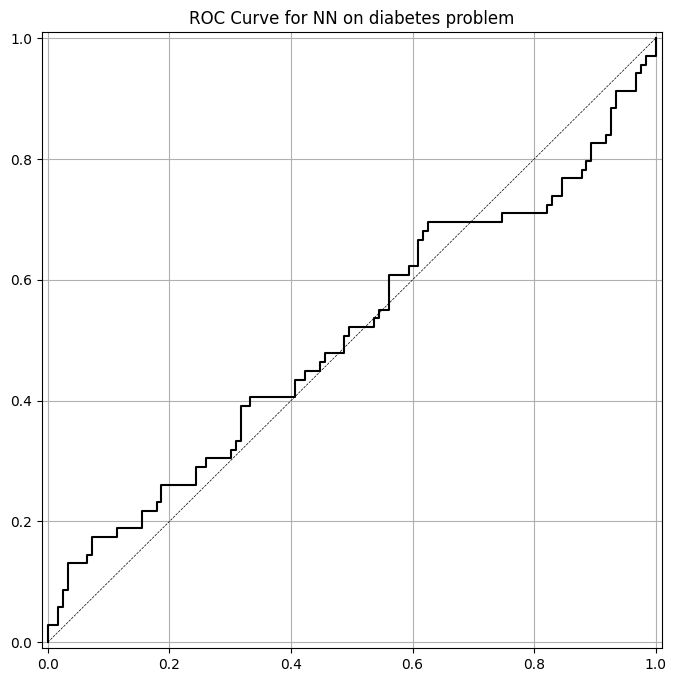

In [34]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [35]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

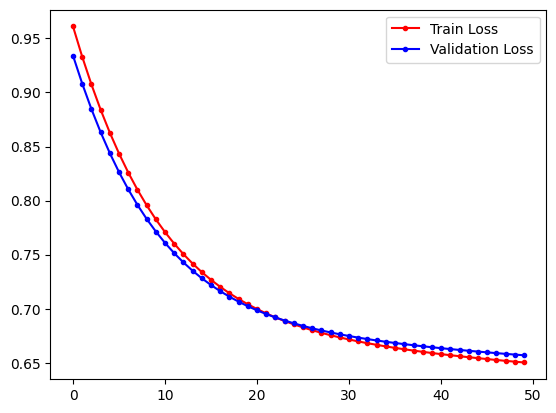

In [36]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [37]:
## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6284 - loss: 0.6603 - val_accuracy: 0.6458 - val_loss: 0.6563
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6782 - loss: 0.6370 - val_accuracy: 0.6458 - val_loss: 0.6557
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6696 - loss: 0.6410 - val_accuracy: 0.6458 - val_loss: 0.6550
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6455 - loss: 0.6558 - val_accuracy: 0.6458 - val_loss: 0.6544
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6801 - loss: 0.6355 - val_accuracy: 0.6458 - val_loss: 0.6539
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6385 - loss: 0.6568 - val_accuracy: 0.6458 - val_loss: 0.6533
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6666 - loss: 0.6445 - val_accuracy: 0.6458 - val_loss: 0.6527
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6605 - loss: 0.6443 - val_accuracy: 0.6458 - 

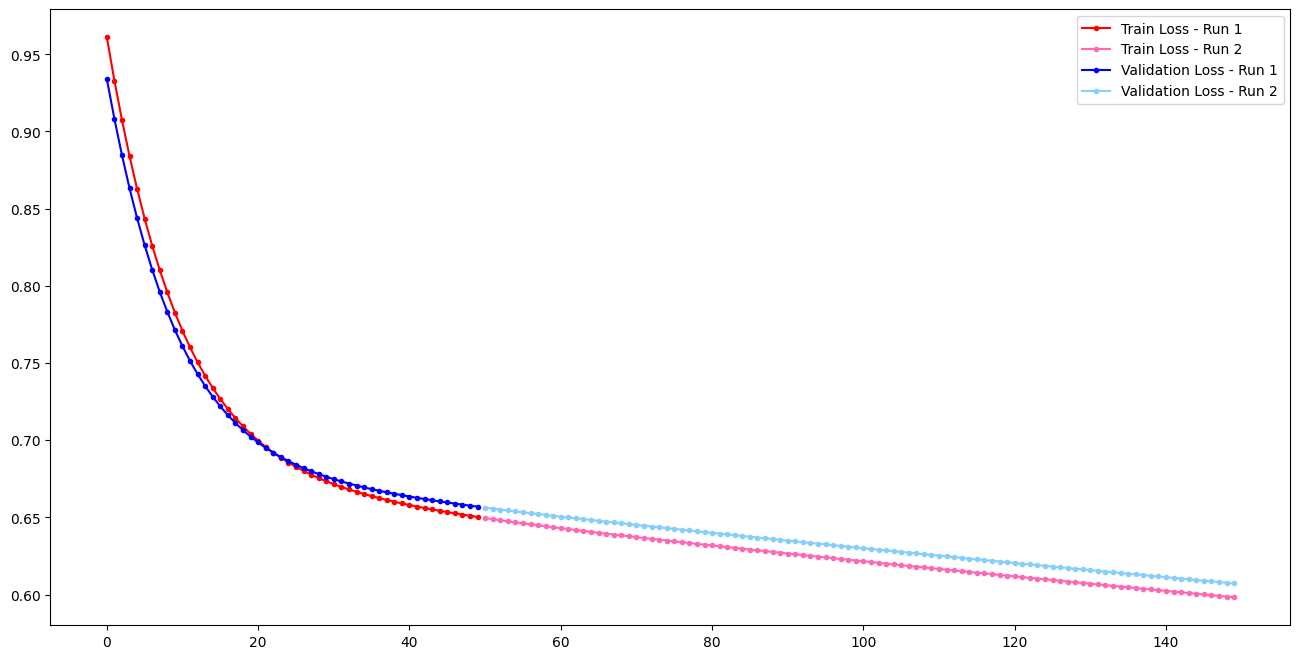

In [38]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

In [40]:
### BEGIN SOLUTION
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(8,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(learning_rate= .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=150)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4020 - loss: 0.7550 - val_accuracy: 0.4375 - val_loss: 0.7668
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3907 - loss: 0.7677 - val_accuracy: 0.4531 - val_loss: 0.7552
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4898 - loss: 0.7212 - val_accuracy: 0.4583 - val_loss: 0.7449
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4665 - loss: 0.7275 - val_accuracy: 0.4844 - val_loss: 0.7357
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5074 - loss: 0.7083 - val_accuracy: 0.4896 - val_loss: 0.7274
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5041 - loss: 0.7067 - val_accuracy: 0.4896 - val_loss: 0.7199
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5262 - loss: 0.6927 - val_accuracy: 0.5052 - val_loss: 0.7130
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5108 - loss: 0.6999 - val_accuracy: 0.5208 - 

In [41]:
run_hist_2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

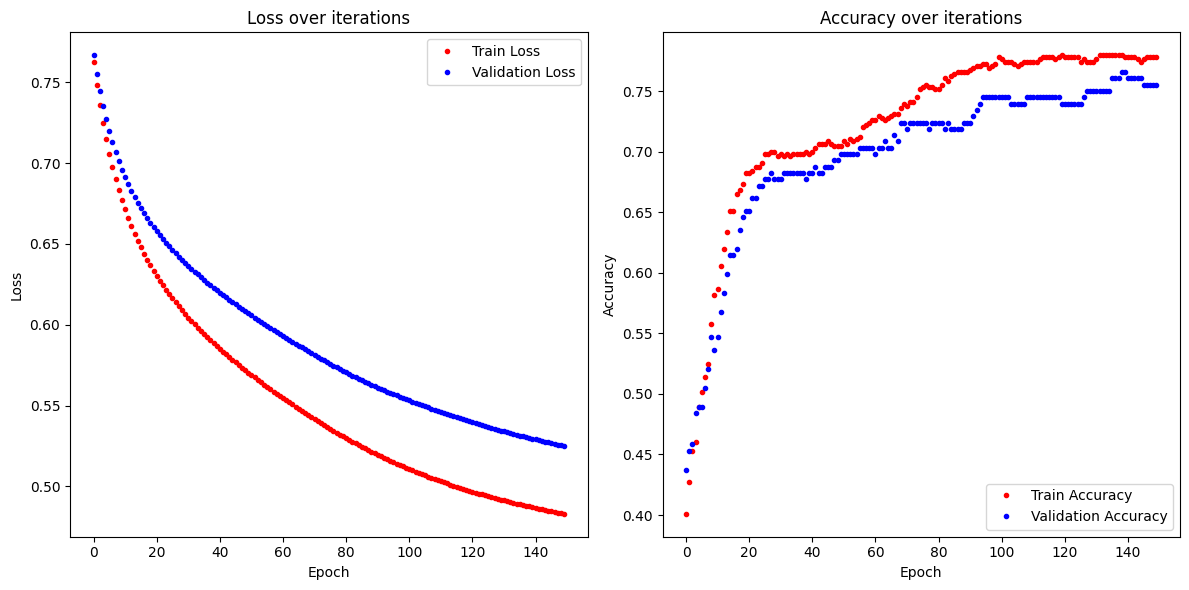

In [42]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))

# Plotting Loss
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), run_hist_2.history["loss"], 'r.', label="Train Loss")
ax.plot(range(n), run_hist_2.history["val_loss"], 'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Plotting Accuracy
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), run_hist_2.history["accuracy"], 'r.', label="Train Accuracy")
ax.plot(range(n), run_hist_2.history["val_accuracy"], 'b.', label="Validation Accuracy")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

accuracy is 0.755
roc-auc is 0.796


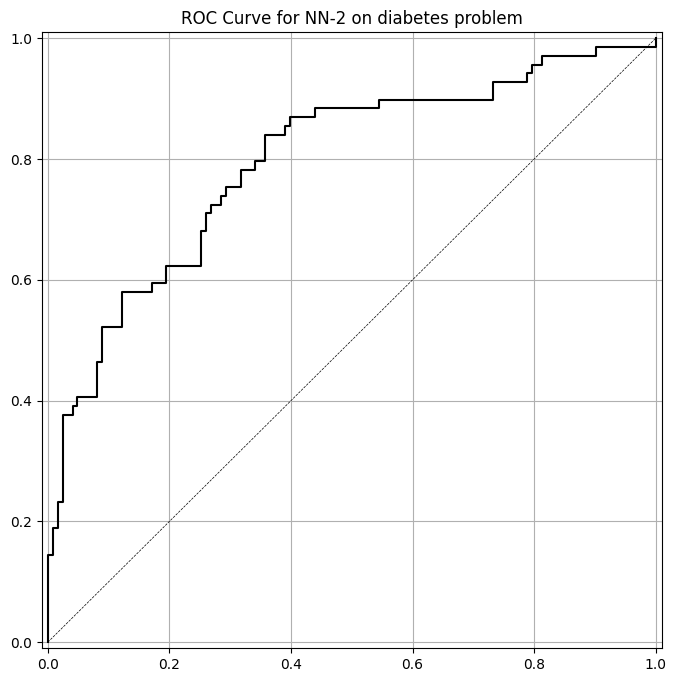

In [44]:
# Use model.predict to get the predicted probabilities
y_pred_prob_nn_2 = model_2.predict(x_test_norm)

# Convert predicted probabilities to class labels (0 or 1) using a threshold of 0.5
y_pred_class_nn_2 = (y_pred_prob_nn_2 > 0.5).astype("int32")

# Print accuracy
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test, y_pred_class_nn_2)))

# Print ROC-AUC score
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_nn_2)))

# Plot ROC curve
plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')


In [45]:
# Example new observation
new_person = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Example values

# Normalize the new data based on the same normalizer used for training
new_person_norm = normalizer.transform(new_person)

# Predict the probability of diabetes
probability = model_2.predict(new_person_norm)[0][0]

# Convert probability to binary outcome (threshold of 0.5)
outcome = (probability > 0.5).astype(int)

# Print the result
if outcome == 1:
    print("The person has diabetes.")
else:
    print("The person does not have diabetes.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
The person has diabetes.
